In [140]:
# Import all the necessary packges
import os
import numpy as np
import matplotlib.pyplot as plt
from dicomhd import io as dhd_io
from pydicom.data import get_testdata_file
%matplotlib inline


In [195]:
# unzip all folders

# path_to_data = '/Users/saharzafari/Documents/work/projects/lta/data/HLH-Joe/input/complete/'
# path_to_write = '/Users/saharzafari/Documents/work/projects/lta/data/HLH-Joe/input/unzip/'
# fname_zip = [f for f in os.listdir(path_to_data) if f[-4:] =='.zip']

# for fname in fname_zip:
#     file = os.path.join(path_to_data,fname)
#     with ZipFile(file, 'r') as zip:
#         fname = fname.rsplit('.',1)[0]
#         print(fname)
#         os.mkdir(os.path.join(path_to_write, fname))
#         zip.extractall(os.path.join(path_to_write, fname))

# # fname_zip[2]



In [218]:
# uzip dcm files
path_to_data = '/Users/saharzafari/Documents/work/projects/lta/data/HLH-Samir/output/complete/'
path_to_write = '/Users/saharzafari/Documents/work/projects/lta/data/HLH-Samir/output/'
unzip_dcm(path_to_data, path_to_write)

extract consolidation-000097-Samir_reviewed_1-1097
extract Reticular-293767-Samir_reviewed_1-593
extract Reticular-5e51ab-Samir_reviewed_1-560
extract Reticular-202602-Samir_reviewed_1-590
extract consolidation-000906-Samir_reviewed_1-1103
extract groundglass-269931-Samir_reviewed_1-154
extract Reticular-b251a2-Samir_reviewed_1-578
extract groundglass-266330-Samir_reviewed_1-157
extract Hyperlucent-196112-Samir_reviewed_1-752
extract Honeycomb-013710-Samir_reviewed_1-374
extract groundglass-5ff7d9-Samir-2_reviewed_1-259
extract groundglass-7f7a02-Samir_reviewed_1-213
extract Normal-096528-Samir_reviewed_1-857
extract Honeycomb-695c19-Samir_reviewed_1-350
extract Hyperlucent-e811ea-Samir_reviewed_1-743
extract consolidation-000082-Samir_reviewed_1-1086
extract Hyperlucent-182344-Samir_reviewed_1-749
extract Hyperlucent-30260S-Samir_reviewed_1-758
extract Normal-edd293-Samir_reviewed_1-875
extract consolidation-000124-Samir_reviewed_1-1098
extract Hyperlucent-09e009-Samir_reviewed_1-737


In [210]:
# function to unzip folders 
def unzip_dcm(path_to_data, path_to_write):
    if not os.path.exists(os.path.join(path_to_write, 'unzip')):
        os.mkdir(os.path.join(path_to_write,'unzip'))
        path_to_write = os.path.join(path_to_write, 'unzip')
    fname_zip = [f for f in os.listdir(path_to_data) if f[-4:] =='.zip']
    for fname in fname_zip:
        file = os.path.join(path_to_data,fname)
        with ZipFile(file, 'r') as zip:
            fname = fname.rsplit('.',1)[0]
            os.mkdir(os.path.join(path_to_write, fname))
            zip.extractall(os.path.join(path_to_write, fname))
            print(f'extract {fname}')

In [215]:
path_to_write = os.path.join(path_to_write,'unzip')
path_to_write

'/Users/saharzafari/Documents/work/projects/lta/data/HLH-Samir/input/unzip/unzip'

In [ ]:
# Define a function to visualize the data
from ipywidgets import interact
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 0
    plt.imshow(image_data.pixel_data[layer, :, :], cmap='gray');
    plt.title('Explore Layers of LUNG CT', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.pixel_data.shape[0] - 1));

In [219]:
from dicomhd import io as dhd_io
from dicomhd import data_structures as dhd_ds
patients = dhd_io.sort_dcm_directory('./000047-MIDRC-RICORD-1A-660042-000047')
dcm_series = series[0]
dcm_series = dhd_io.load_series(dcm_series)
print(dcm_series.shape)
print(dcm_series.shape)
print(dcm_series.pixel_data)
print(dcm_series.pixel_data.shape)
dcm_series = dhd_io.load_series(dcm_series)
print(dcm_series.pixel_data.shape)

ValueError: The length of the pixel data in the dataset (128752 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.

In [66]:
image_path = './000047-MIDRC-RICORD-1A-660042-000047/'
image_data = dhd_io.read_series(image_path)

In [61]:
# Get the image shape and print it out
depth, height, width = image_data.shape
print(f'The image object has the follwing dimension: depth:{depth}, height: {height}, width: {width}')

The image object has the follwing dimension: depth:184, height: 512, width: 512


Plotting Layer 180 of Image


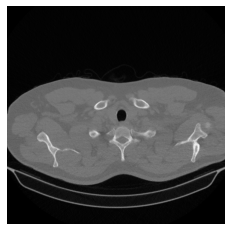

In [79]:
# Select random layer number
maxval = 183
i = np.random.randint(0, maxval)
print(f"Plotting Layer {i} of Image")
plt.imshow(image_data.pixel_data[i, :, :], cmap='gray')
plt.axis('off');

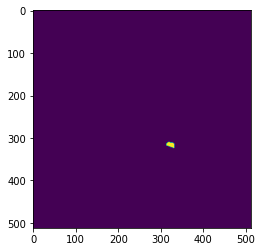

In [100]:
#read labels
from medpy.io import load
lbl_data, lbl_header = load('annotation.gipl')

plt.imshow(image_data.pixel_data[81, :, :], cmap='gray')

plt.imshow(lbl_data[:,:,36])

In [94]:
idx = [] # slices with annoatations
for i in range(lbl_data.shape[-1]):
#     print(i, lbl_data[:, :, i].sum())
    if lbl_data[:,:,i].sum() != 0:
        idx.append(i)

In [95]:
print(idx)
len(idx)

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 58, 59, 60, 61, 62, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 104, 105, 106, 107]


43

interactive(children=(IntSlider(value=91, description='layer', max=183), Output()), _dom_classes=('widget-inte…

In [124]:
#overlay two images
import cv2
bk = image_data.pixel_data[50,:,:]
overlay = lbl_data[:,:,50]
# dst = cv2.addWeighted(bk,0.5,overlay,0.7,0)
# overlay.shape

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-v0gme71y/opencv/modules/core/src/arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


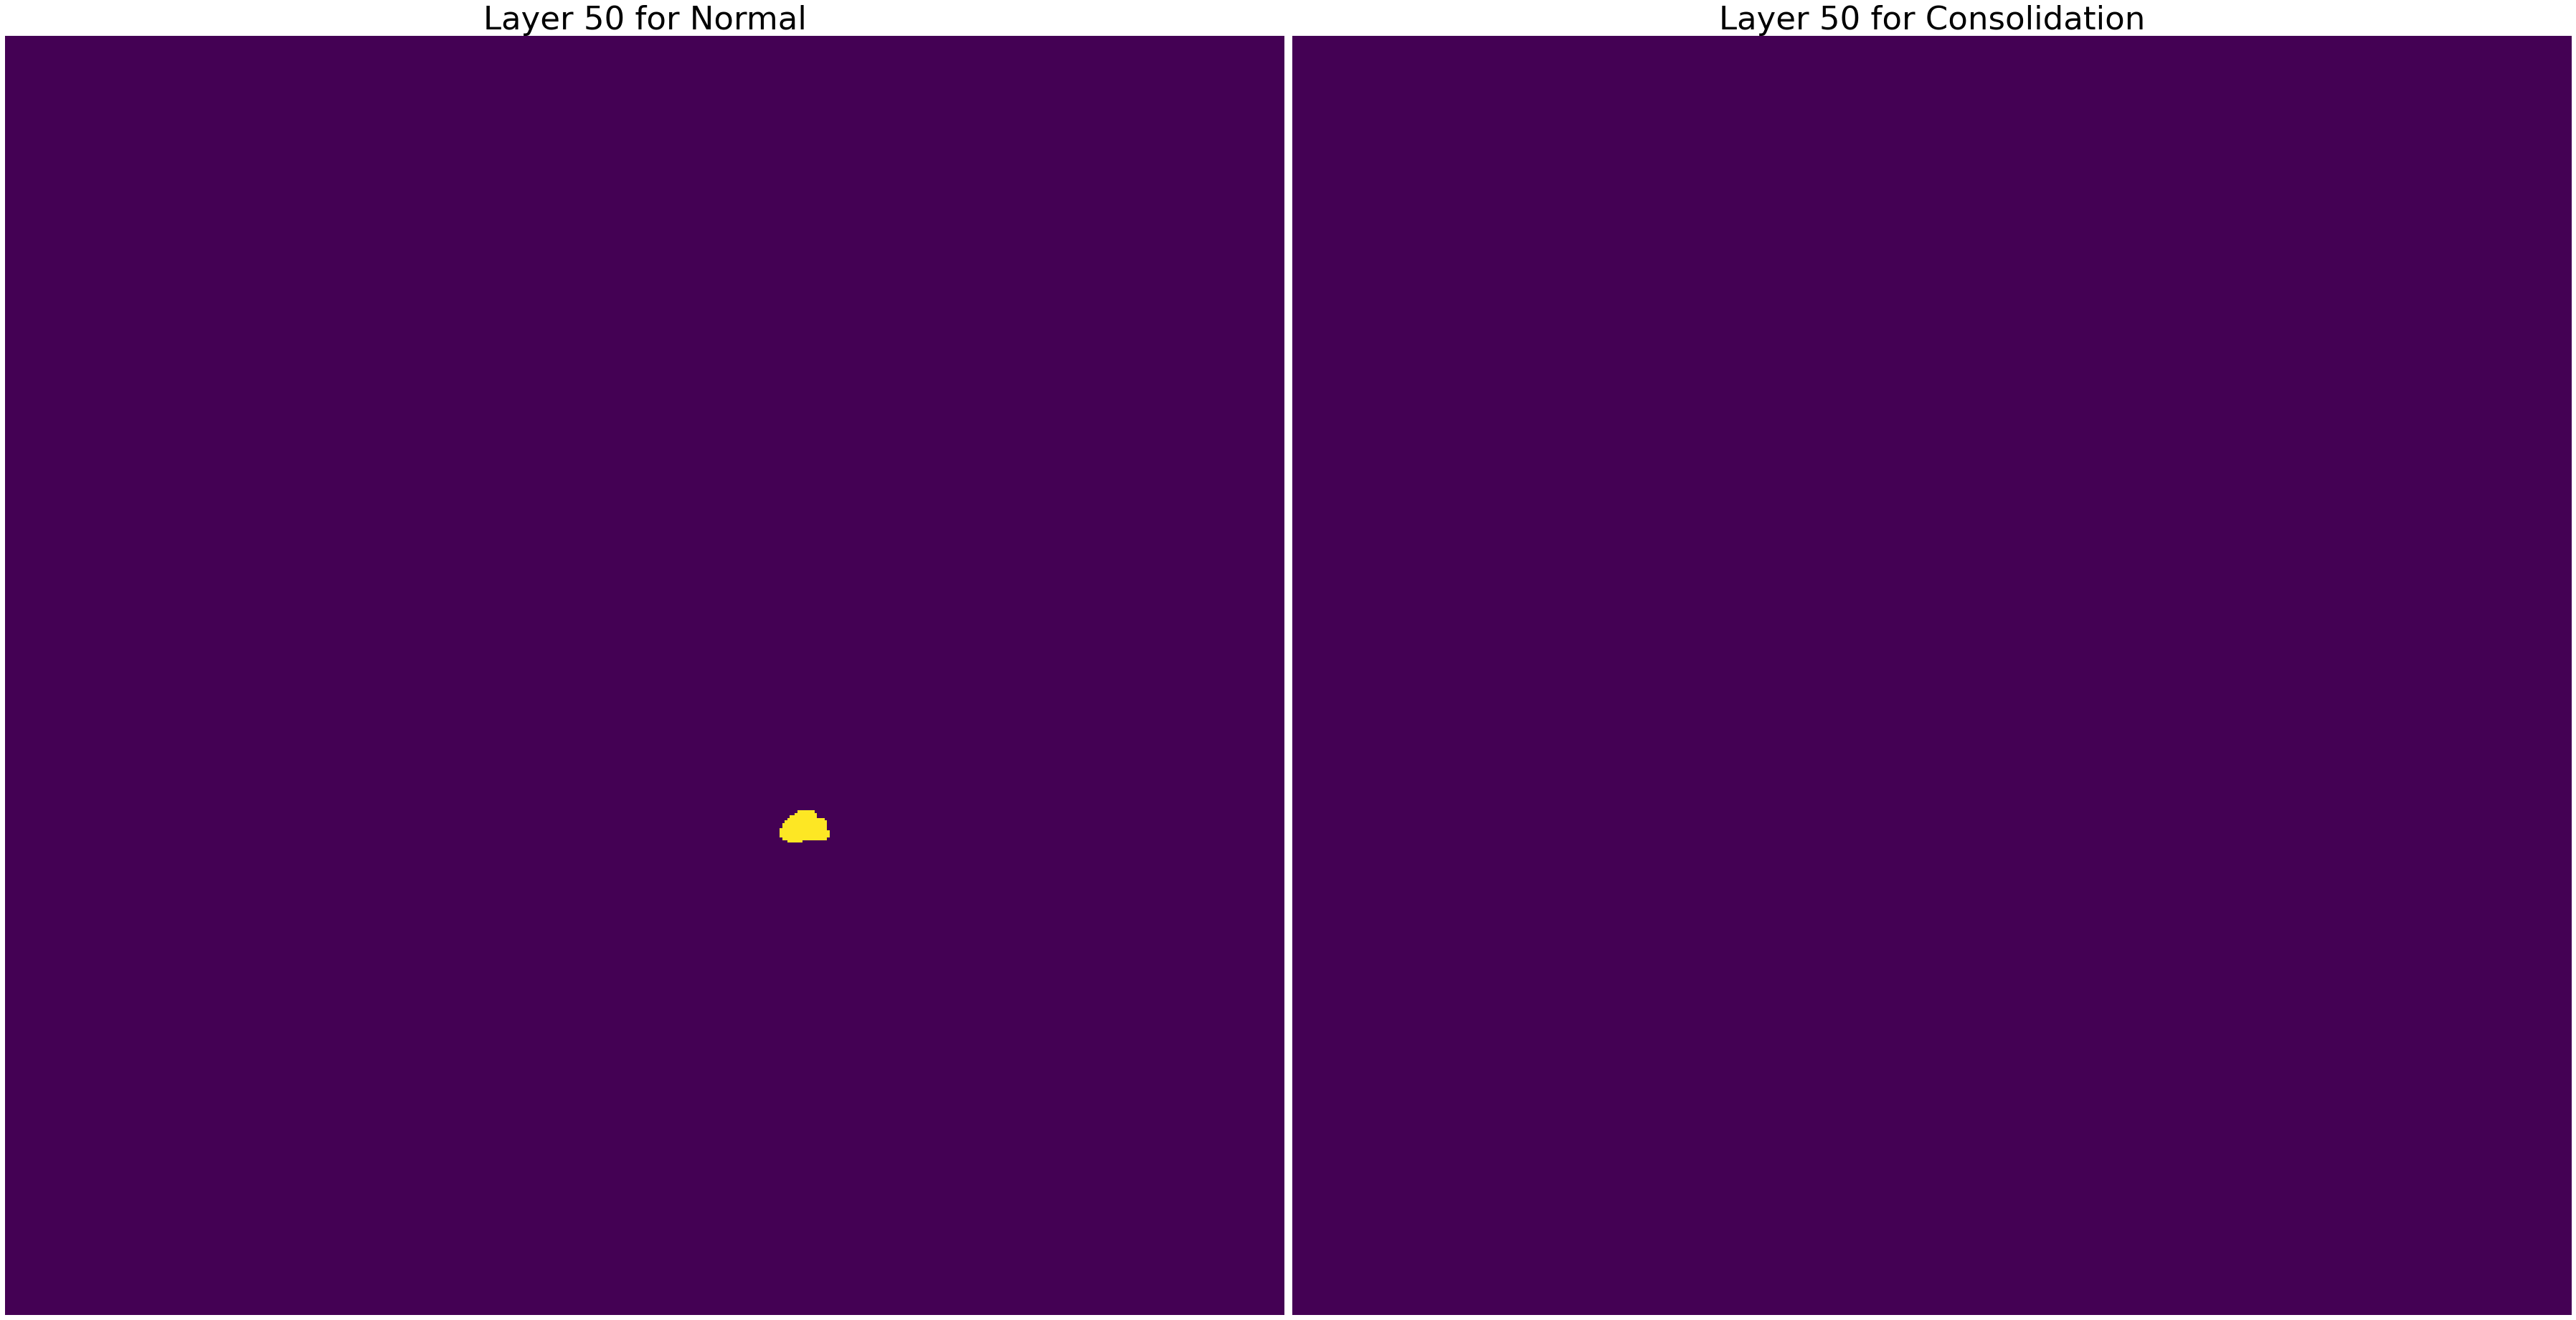

In [114]:
from medpy.io import load
lbl_data, lbl_header = load('annotation.gipl')

# Define a single layer for plotting
layer = 50
# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Consolidation': 1.
}
# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50, 30))
for i in range(2):
    img_label_str = list(classes_dict.keys())[i]
    img = lbl_data[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 0, 255)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [125]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [126]:
show_images(img)

TypeError: 'ZipFile' object is not callable

<Figure size 432x288 with 0 Axes>